# Immunization rates

In [16]:
import pandas as pd

immunization_rates = pd.read_csv('../data/raw/full-immunization.csv', skiprows=[1]) \
    .rename(columns={"Unnamed: 0": "Country"}) \
    .set_index('Country') \
    .fillna(0)

immunization_rates
bcg = immunization_rates.columns[0]

# WDI Data

In [17]:
import pandas as pd
wdi_data = pd.read_csv('../data/raw/WDIData.csv')

In [18]:
wdi_country_name_map = {
    "Bahamas, The": "Bahamas",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Congo, Rep.": "Congo",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Czech Republic": "Czechia",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Egypt, Arab Rep.": "Egypt",
    "Gambia, The": "Gambia",
    "Iran, Islamic Rep.": "Iran (Islamic Republic of)",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Lao People's Democratic Republic",
    "Micronesia, Fed. Sts.": "Micronesia (Federated States of)",
    "Korea, Rep.": "Republic of Korea",
    "Moldova": "Republic of Moldova",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Sao Tome and Principe": "Sao Tome and Principe",
    "Slovak Republic": "Slovakia",
    "North Macedonia": "Republic of North Macedonia",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "Tanzania": "United Republic of Tanzania",
    "United States": "United States of America",
    "Venezuela, RB": "Venezuela (Bolivarian Republic of)",
    "Vietnam": "Viet Nam",
    "Yemen, Rep.": "Yemen"
}

wdi_regions = [
    "Arab World",
    "Caribbean small states",
    "Central Europe and the Baltics",
    "Early-demographic dividend",
    "East Asia & Pacific",
    "East Asia & Pacific (excluding high income)",
    "East Asia & Pacific (IDA & IBRD countries)",
    "Euro area",
    "Europe & Central Asia",
    "Europe & Central Asia (excluding high income)",
    "Europe & Central Asia (IDA & IBRD countries)",
    "European Union",
    "Fragile and conflict affected situations",
    "Heavily indebted poor countries (HIPC)",
    "High income",
    "IBRD only",
    "IDA & IBRD total",
    "IDA blend",
    "IDA only",
    "IDA total",
    "Late-demographic dividend",
    "Latin America & Caribbean",
    "Latin America & Caribbean (excluding high income)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Least developed countries: UN classification",
    "Low & middle income",
    "Low income",
    "Lower middle income",
    "Middle East & North Africa",
    "Middle East & North Africa (excluding high income)",
    "Middle East & North Africa (IDA & IBRD countries)",
    "Middle income",
    "North America",
    "Not classified",
    "OECD members",
    "Other small states",
    "Pacific island small states",
    "Post-demographic dividend",
    "Pre-demographic dividend",
    "Small states",
    "South Asia",
    "South Asia (IDA & IBRD)",
    "Sub-Saharan Africa",
    "Sub-Saharan Africa (excluding high income)",
    "Sub-Saharan Africa (IDA & IBRD countries)",
    "Upper middle income",
    "World"
]

def translate_name(x):
    if x in wdi_country_name_map:
        return wdi_country_name_map[x]
    else:
        return x

def build_indicator_data(indicator):
    d = wdi_data[wdi_data['Indicator Code'] == indicator] \
        .drop(['Indicator Name', 'Indicator Code', 'Country Code'], axis=1) \
        .melt(id_vars=['Country Name'], var_name='year').dropna() \
        .sort_values(by=['year']).drop_duplicates('Country Name', keep='last')
    d['Country Name'] = d['Country Name'].map(translate_name)
    d = d.set_index('Country Name')
    d.drop(d.index.intersection(pd.Index(wdi_regions)), inplace=True)
    return d

intl_arrivals = build_indicator_data('ST.INT.ARVL')
population = build_indicator_data('SP.POP.TOTL')
population

year       value
Country Name                         
Eritrea              2011   3213972.0
Montenegro           2018    622227.0
Mongolia             2018   3170208.0
Monaco               2018     38682.0
Republic of Moldova  2018   2706049.0
...                   ...         ...
Costa Rica           2018   4999441.0
Côte d'Ivoire        2018  25069229.0
Croatia              2018   4087843.0
Curacao              2018    159800.0
Zimbabwe             2018  14439018.0

[217 rows x 2 columns]

# Case data parsing

In [19]:
import pandas as pd
covid_cases_raw = pd.read_csv('../data/raw/time_series_covid19_confirmed_global.csv')
covid_deaths_raw = pd.read_csv('../data/raw/time_series_covid19_deaths_global.csv')

In [20]:
covid_cases_raw

Province/State         Country/Region        Lat       Long  \
0                          NaN            Afghanistan  33.000000  65.000000   
1                          NaN                Albania  41.153300  20.168300   
2                          NaN                Algeria  28.033900   1.659600   
3                          NaN                Andorra  42.506300   1.521800   
4                          NaN                 Angola -11.202700  17.873900   
..                         ...                    ...        ...        ...   
259  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
260                        NaN            South Sudan   6.877000  31.307000   
261                        NaN         Western Sahara  24.215500 -12.885800   
262                        NaN  Sao Tome and Principe   0.186360   6.613081   
263                        NaN                  Yemen  15.552727  48.516388   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/2/20  \
0          0        0        0        0        0        0  ...     273   
1          0        0        0        0        0        0  ...     277   
2          0        0        0        0        0        0  ...     986   
3          0        0        0        0        0        0  ...     428   
4          0        0        0        0        0        0  ...       8   
..       ...      ...      ...      ...      ...      ...  ...     ...   
259        0        0        0        0        0        0  ...       0   
260        0        0        0        0        0        0  ...       0   
261        0        0        0        0        0        0  ...       0   
262        0        0        0        0        0        0  ...       0   
263        0        0        0        0        0        0  ...       0   

     4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  
0       281     299     349     367     423     444     484      521      555  
1       304     333     361     377     383     400     409      416      433  
2      1171    1251    1320    1423    1468    1572    1666     1761     1825  
3       439     466     501     525     545     564     583      601      601  
4         8      10      14      16      17      19      19       19       19  
..      ...     ...     ...     ...     ...     ...     ...      ...      ...  
259       0       0       1       1       1       1       1        1        1  
260       0       0       1       1       2       2       3        4        4  
261       0       0       4       4       4       4       4        4        4  
262       0       0       0       4       4       4       4        4        4  
263       0       0       0       0       0       0       0        1        1  

[264 rows x 85 columns]

In [21]:
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

first_date_column = 4
country_column = 1

case_data_country_name_map = {
 "Bolivia": "Bolivia (Plurinational State of)",
 "Brunei": "Brunei Darussalam",
 "Congo (Brazzaville)": "Congo",
 "Cote d'Ivoire": "Côte d'Ivoire",
 "Korea, South": "Democratic People's Republic of Korea",
 "Congo (Kinshasa)": "Democratic Republic of the Congo",
 "Iran": "Iran (Islamic Republic of)",
 "Laos": "Lao People's Democratic Republic",
 "Burma": "Myanmar",
 "Korea, South": "Republic of Korea",
 "Moldova": "Republic of Moldova",
 "Russia": "Russian Federation",
 "Syria": "Syrian Arab Republic",
 "North Macedonia": "Republic of North Macedonia",
 "Taiwan*": "Taiwan, China",
 "Tanzania": "United Republic of Tanzania",
 "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
 "US": "United States of America",
 "Venezuela": "Venezuela (Bolivarian Republic of)",
 "Vietnam": "Viet Nam",
}
omitted_countries = ["Diamond Princess"]

def growth_factor(row):
    v = row['value']
    d = row['delta']
    if pd.isna(v) or v - d == 0:
        return math.nan
    return v / (v - d)

def get_delta_series(df):
    return df.drop(['date'], axis=1) \
        .groupby(['Country/Region']) \
        .diff()['value']

def build_case_data(raw_data):
    d = raw_data.drop(['Lat','Long','Province/State'], axis=1) \
        .groupby(['Country/Region']).sum() \
        .reset_index() \
        .melt(id_vars=['Country/Region'], var_name='date').dropna() \
        .sort_values(by=['date'])
    d['Country/Region'] = d['Country/Region'].map(translate_name)
    d = d.sort_values(by=['date'])
    d['delta'] = get_delta_series(d)
    d['growth'] = d.apply(growth_factor, axis=1)
    d = d.set_index('Country/Region')
    d.drop(d.index.intersection(pd.Index(wdi_regions)), inplace=True)
    return d

def view_cases(df):
    df[(df['growth'] >= 1) & (df['growth'] <= 1.6) & (df['value'] > 50)].hist(bins=25)

covid_cases = build_case_data(covid_cases_raw)
covid_deaths = build_case_data(covid_deaths_raw)
covid_deaths.loc['Australia']
#view_cases(covid_cases)

date  value  delta    growth
Country/Region                                 
Australia       1/22/20      0    NaN       NaN
Australia       1/23/20      0    0.0       NaN
Australia       1/24/20      0    0.0       NaN
Australia       1/25/20      0    0.0       NaN
Australia       1/26/20      0    0.0       NaN
...                 ...    ...    ...       ...
Australia        4/5/20     35    5.0  1.166667
Australia        4/6/20     40    5.0  1.142857
Australia        4/7/20     45    5.0  1.125000
Australia        4/8/20     50    5.0  1.111111
Australia        4/9/20     51    1.0  1.020000

[81 rows x 4 columns]

<Figure size 864x576 with 0 Axes>

# Income group data

In [22]:
import pandas as pd

income_group_raw = pd.read_csv('../data/raw/income-groups.csv')
income_group_raw

Economy Code   X                      Region  \
0              Afghanistan  AFG NaN                  South Asia   
1                  Albania  ALB NaN       Europe & Central Asia   
2                  Algeria  DZA NaN  Middle East & North Africa   
3           American Samoa  ASM NaN         East Asia & Pacific   
4                  Andorra  AND NaN       Europe & Central Asia   
..                     ...  ...  ..                         ...   
213  Virgin Islands (U.S.)  VIR NaN   Latin America & Caribbean   
214     West Bank and Gaza  PSE NaN  Middle East & North Africa   
215            Yemen, Rep.  YEM NaN  Middle East & North Africa   
216                 Zambia  ZMB NaN          Sub-Saharan Africa   
217               Zimbabwe  ZWE NaN          Sub-Saharan Africa   

            Income group Lending category Other  
0             Low income              IDA  HIPC  
1    Upper middle income             IBRD   NaN  
2    Upper middle income             IBRD   NaN  
3    Upper middle income               ..   NaN  
4            High income               ..   NaN  
..                   ...              ...   ...  
213          High income               ..   NaN  
214  Lower middle income               ..   NaN  
215           Low income              IDA   NaN  
216  Lower middle income              IDA  HIPC  
217  Lower middle income            Blend   NaN  

[218 rows x 7 columns]

# Fatality growth rate by immunization levels

It's evident that testing numbers are highly unreliable. This is observable by looking at the "naive CFR" rates evident in UK and others:

naiveCFR = deaths/cases

This naiveCFR can exceed 10% (12.5% in the UK at 2020-04-12), even without factoring delay between case identification and death.

The efficacy of testing also varies greatly country to country as some use more dubious methods than others.  E.g., https://www.theguardian.com/world/2020/apr/04/uk-risks-losing-offer-of-400000-covid-19-testing-kits-a-week

However in a moderately capable country, it should be rare that a _death_ caused by COVID-19 were not attributed to COVID-19 correctly. Thus we do analysis using deaths, not confirmed cases.

In [23]:
income_groups = [
    "low income",
    "lower middle income",
    "upper middle income",
    "high income"
]

income_group_country_name_map = {
    "Bahamas, The": "Bahamas",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Congo, Rep.": "Congo",
    "C?te d'Ivoire": "Côte d'Ivoire",
    "Czech Republic": "Czechia",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Egypt, Arab Rep.": "Egypt",
    "Gambia, The": "Gambia",
    "Iran, Islamic Rep.": "Iran (Islamic Republic of)",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Lao People's Democratic Republic",
    "Micronesia, Fed. Sts.": "Micronesia (Federated States of)",
    "Korea, Rep.": "Republic of Korea",
    "Moldova": "Republic of Moldova",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "S?o Tom? and Principe": "Sao Tome and Principe",
    "Slovak Republic": "Slovakia",
    "North Macedonia": "Republic of North Macedonia",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "Tanzania": "United Republic of Tanzania",
    "United States": "United States of America",
    "Venezuela, RB": "Venezuela (Bolivarian Republic of)",
    "Vietnam": "Viet Nam",
    "Yemen, Rep.": "Yemen"
}

def build_income_group_data(indicator):
    d = income_group_raw.loc[:,['Economy', 'Code', 'Income group']]
    d['Economy'].map(translate_name)
    d['Income rank'] = d.apply(lambda r: income_groups.index(r['Income group'].lower()), axis=1)
    return d

income_group = build_income_group_data(income_group_raw).set_index('Economy')

income_group

Code         Income group  Income rank
Economy                                                     
Afghanistan            AFG           Low income            0
Albania                ALB  Upper middle income            2
Algeria                DZA  Upper middle income            2
American Samoa         ASM  Upper middle income            2
Andorra                AND          High income            3
...                    ...                  ...          ...
Virgin Islands (U.S.)  VIR          High income            3
West Bank and Gaza     PSE  Lower middle income            1
Yemen, Rep.            YEM           Low income            0
Zambia                 ZMB  Lower middle income            1
Zimbabwe               ZWE  Lower middle income            1

[218 rows x 3 columns]

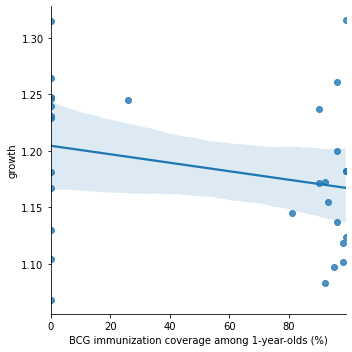

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df = covid_deaths[covid_deaths['value'] > 1]
count_records_series = df.groupby(['Country/Region']).size()
df = df.join(count_records_series.to_frame('day_count'))
df = df[(df['day_count'] > 21) & (df['day_count'] < 35) & (df['growth'] < 2.5)] \
    .groupby(['Country/Region']).mean() \
    .join(income_group)

# Narrow to countries in upper middle income groups; no faith in lower income groups
# to attribute death due to COVID-19 accurately.
df = df[df['Income rank'] >= 2]

sns.lmplot(data=df.join(immunization_rates[bcg]), x=bcg, y='growth', fit_reg=True)

# Deaths per million by immunization levels

Text(1.6749999999999972, 0.5, 'Deaths per million')

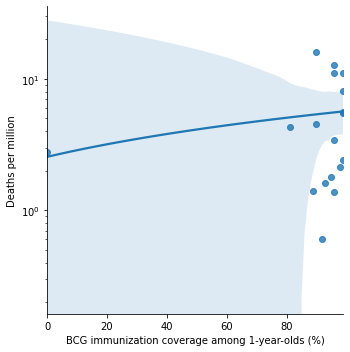

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def infections_per_million(row):
    p = row['population']
    if pd.isna(p) or p == 0:
        return math.nan
    return row['value'] / (p / 1000000)

df = covid_deaths[covid_deaths['value'] > 1]
count_records_series = df.groupby(['Country/Region']).size()
df = df.join(count_records_series.to_frame('day_count'))

df = df[(df['day_count'] >= 21)] \
    .groupby(['Country/Region']) \
    .last() \
    .drop(['date','growth','delta'], axis=1) \
    .join(population.rename(columns={'value':'population'})) \
    .join(income_group)
    
df = df[df['Income rank'] == 2]
df['spread'] = df.apply(infections_per_million, axis=1)

sns.lmplot(data=df.join(immunization_rates[bcg]), x=bcg, y='spread', fit_reg=True, ci=95)
plt.yscale('log')
plt.ylabel("Deaths per million")
